In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
image_size = (256, 256)
batch_size = 1
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/garbage-classification/Garbage classification/Garbage classification',
  validation_split=0.2,
  subset="training",
  image_size=image_size,
  seed=123,
  batch_size=batch_size,
  color_mode="rgb"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/garbage-classification/Garbage classification/Garbage classification',
  validation_split=0.2,
  subset="validation",
  image_size=image_size,
  seed=123,
  batch_size=batch_size,
  color_mode="rgb"
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [3]:
class_names = train_ds.class_names
num_classes = len(train_ds.class_names)
image_shape = image_size + (3,)
count = dict.fromkeys(class_names, 0)
for image, labels in train_ds:
    for i in range(batch_size):
        count[class_names[labels[0]]] += 1

([<matplotlib.axis.XTick at 0x7d8d70411750>,
 [Text(0, 0, 'cardboard'),
  Text(1, 0, 'glass'),
  Text(2, 0, 'metal'),
  Text(3, 0, 'paper'),
  Text(4, 0, 'plastic'),
  Text(5, 0, 'trash')])

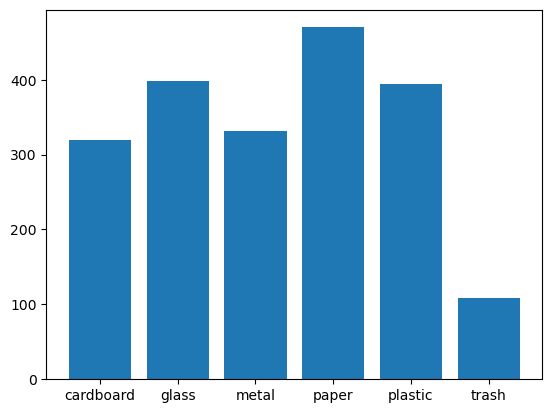

In [4]:
plt.bar(range(len(count)), list(count.values()), align='center')
plt.xticks(range(len(count)), list(count.keys()))

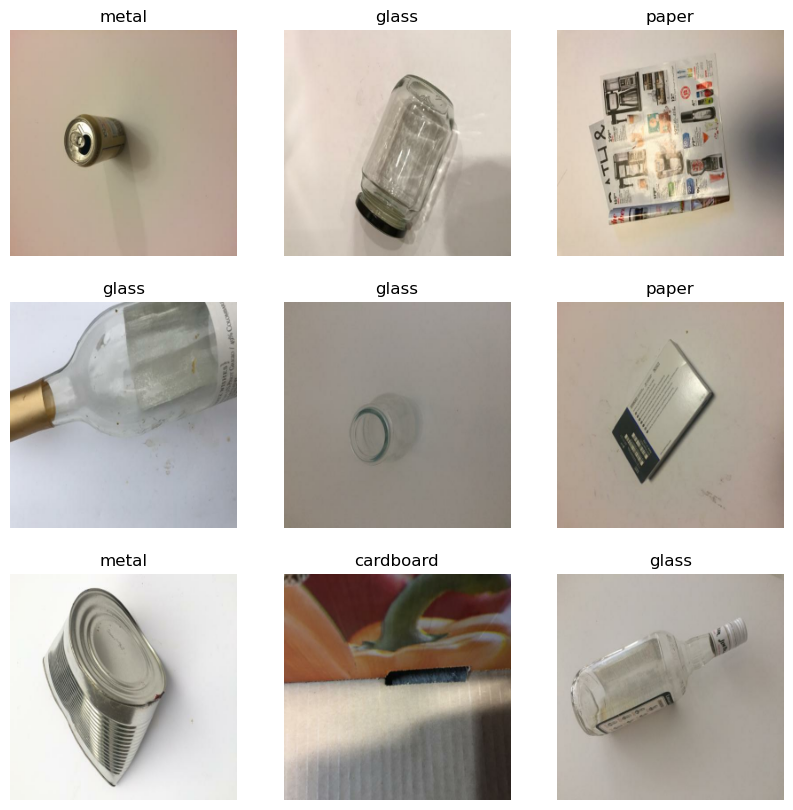

In [5]:
plt.figure(figsize=(10,10))

for i, example in enumerate(train_ds.take(9)):
    image = example[0][0]
    label = example[1][0]
    
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_names[label])
    plt.axis("off")


# Neural Network

In [6]:
model = Sequential([
    layers.Input(shape=image_shape),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(num_classes)
])


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2023-04-22 22:03:20.388929: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2022/2022 [==============================] - 85s 39ms/step - loss: 542.3392 - accuracy: 0.2834 - val_loss: 1.8292 - val_accuracy: 0.0574
Epoch 2/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.7465 - accuracy: 0.3294 - val_loss: 1.8465 - val_accuracy: 0.1723
Epoch 3/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.8629 - accuracy: 0.2982 - val_loss: 1.8199 - val_accuracy: 0.1743
Epoch 4/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.7995 - accuracy: 0.2794 - val_loss: 1.8029 - val_accuracy: 0.1762
Epoch 5/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.7466 - accuracy: 0.2621 - val_loss: 1.7660 - val_accuracy: 0.1822
Epoch 6/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.8256 - accuracy: 0.2463 - val_loss: 1.7435 - val_accuracy: 0.2475
Epoch 7/15
2022/2022 [==============================] - 78s 39ms/step - loss: 1.7273 - accuracy: 0.2730 - val_loss: 1.7201 - val_accu

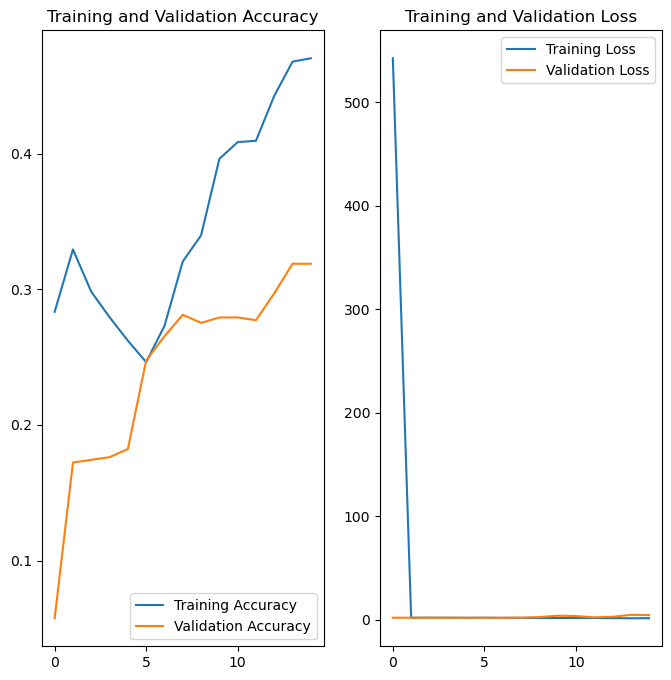

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Convolutional Neural Network

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=image_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)       

In [14]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
2022/2022 [==============================] - 25s 8ms/step - loss: 1.7200 - accuracy: 0.2591 - val_loss: 1.5816 - val_accuracy: 0.3366
Epoch 2/15
2022/2022 [==============================] - 14s 7ms/step - loss: 1.5269 - accuracy: 0.3813 - val_loss: 1.5331 - val_accuracy: 0.3564
Epoch 3/15
2022/2022 [==============================] - 15s 7ms/step - loss: 1.2378 - accuracy: 0.5178 - val_loss: 1.5599 - val_accuracy: 0.3584
Epoch 4/15
2022/2022 [==============================] - 16s 8ms/step - loss: 0.8047 - accuracy: 0.7018 - val_loss: 1.9094 - val_accuracy: 0.4198
Epoch 5/15
2022/2022 [==============================] - 15s 7ms/step - loss: 0.4572 - accuracy: 0.8432 - val_loss: 2.5062 - val_accuracy: 0.3881
Epoch 6/15
2022/2022 [==============================] - 15s 7ms/step - loss: 0.2998 - accuracy: 0.9105 - val_loss: 3.5812 - val_accuracy: 0.4238
Epoch 7/15
2022/2022 [==============================] - 15s 7ms/step - loss: 0.1926 - accuracy: 0.9357 - val_loss: 4.2626 - val_ac

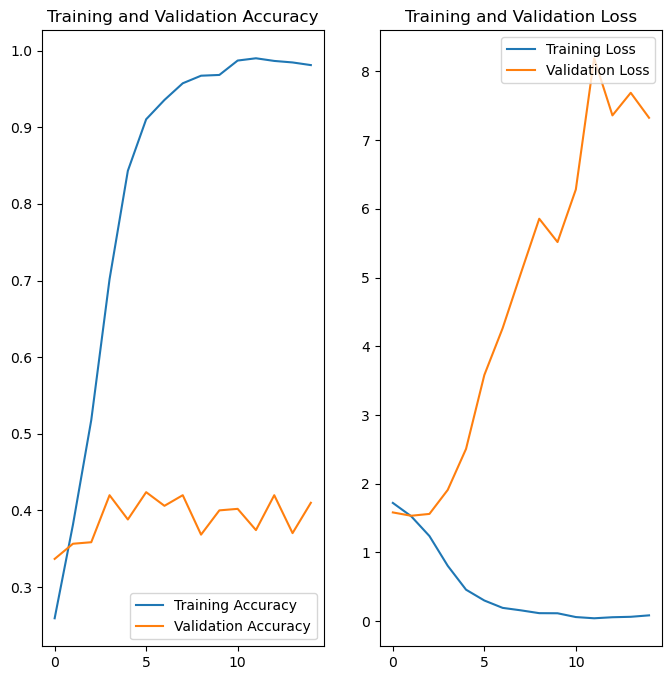

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Transfer Learning

In [16]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

## Base Model

In [17]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [18]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(1, 8, 8, 1280)


In [19]:
base_model.trainable = False

## Feature Extraction

### Data Augmentation

In [20]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

### Adding Classifiaction Head

In [21]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(1, 1280)


In [22]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(1, 1)


In [23]:
inputs = tf.keras.Input(shape=image_shape)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [24]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                             

In [26]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

505/505 [==============================] - 6s 9ms/step - loss: -0.2249 - accuracy: 0.2317


In [27]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: -0.22
initial accuracy: 0.23


In [28]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
2022/2022 [==============================] - 35s 15ms/step - loss: -21.1117 - accuracy: 0.1973 - val_loss: -39.1773 - val_accuracy: 0.2040
Epoch 2/10
2022/2022 [==============================] - 30s 15ms/step - loss: -61.1551 - accuracy: 0.1968 - val_loss: -77.5614 - val_accuracy: 0.2040
Epoch 3/10
2022/2022 [==============================] - 30s 15ms/step - loss: -102.3228 - accuracy: 0.1968 - val_loss: -116.0098 - val_accuracy: 0.2040
Epoch 4/10
2022/2022 [==============================] - 30s 15ms/step - loss: -142.5291 - accuracy: 0.1968 - val_loss: -154.5656 - val_accuracy: 0.2040
Epoch 5/10
2022/2022 [==============================] - 30s 15ms/step - loss: -183.1707 - accuracy: 0.1968 - val_loss: -193.0489 - val_accuracy: 0.2040
Epoch 6/10
2022/2022 [==============================] - 30s 15ms/step - loss: -223.3655 - accuracy: 0.1968 - val_loss: -231.4556 - val_accuracy: 0.2040
Epoch 7/10
2022/2022 [==============================] - 30s 15ms/step - loss: -264.3979 - ac

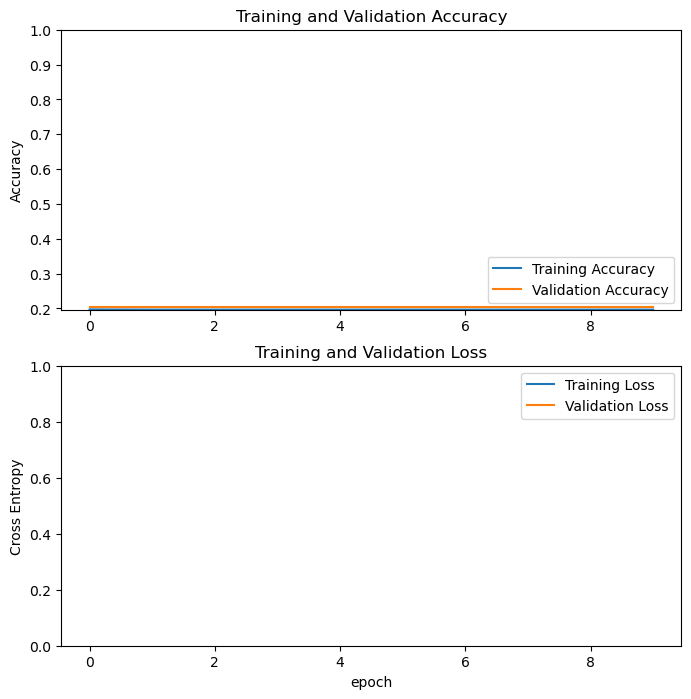

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine Tuning

In [30]:
base_model.trainable = True

In [31]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [32]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                             

In [33]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
2022/2022 [==============================] - 55s 22ms/step - loss: -6343.2456 - accuracy: 0.1968 - val_loss: -6687.9141 - val_accuracy: 0.2040
Epoch 11/20
2022/2022 [==============================] - 44s 22ms/step - loss: -6887.1162 - accuracy: 0.1968 - val_loss: -6748.1274 - val_accuracy: 0.2040
Epoch 12/20
2022/2022 [==============================] - 44s 22ms/step - loss: -7047.5200 - accuracy: 0.1968 - val_loss: -7014.0615 - val_accuracy: 0.2040
Epoch 13/20
2022/2022 [==============================] - 44s 22ms/step - loss: -7208.3350 - accuracy: 0.1968 - val_loss: -7154.0527 - val_accuracy: 0.2040
Epoch 14/20
2022/2022 [==============================] - 44s 22ms/step - loss: -7354.4229 - accuracy: 0.1968 - val_loss: -7254.2358 - val_accuracy: 0.2040
Epoch 15/20
2022/2022 [==============================] - 44s 22ms/step - loss: -7507.6934 - accuracy: 0.1968 - val_loss: -7436.2754 - val_accuracy: 0.2040
Epoch 16/20
2022/2022 [==============================] - 44s 22ms/step

In [34]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

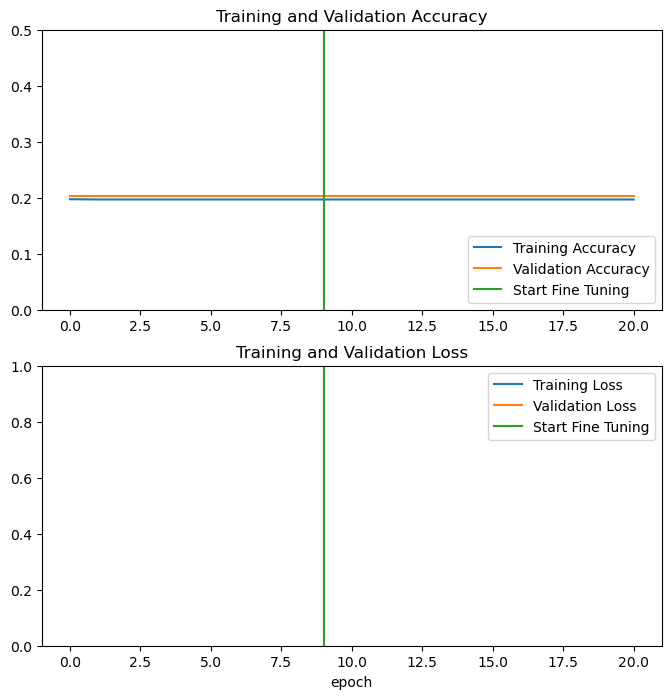

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, .5])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Analyisis
The traditional neural net did not perform well getting less than 30% accuracy on the testing data. The Convolution Neurel Network perform expectedly better, but the validation accuracy could not get higher than 60%. The transferlearning did not work at all. I beleive this is because the classes of objects are not well suited for the classes in the transferred model.